In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/-spotify-tracks-dataset/dataset.csv


# Data importing

> goal :
“Understand what makes songs popular and explore music trends.”

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/kaggle/input/-spotify-tracks-dataset/dataset.csv")  
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.info()         # shows column types and missing values
df.describe()     # summary stats for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


For your dataset:

* You have 114000 rows

* There are 21 columns

* Most columns have complete data except artists, album_name, track_name each missing 1 value

* Columns like danceability, energy, acousticness are float values

* Columns like popularity, duration, key are numeric integers

* explicit is boolean

* track_genre and names are text

In [5]:

df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df = df.drop_duplicates()


In [7]:
df = df.fillna({
    "genre": "Unknown",
    "popularity": df["popularity"].median()
})


In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")


1. converting to lowercase

2. replacing spaces with underscores

# Exploratory Data Analysis

**Popularity Distribution of Songs**

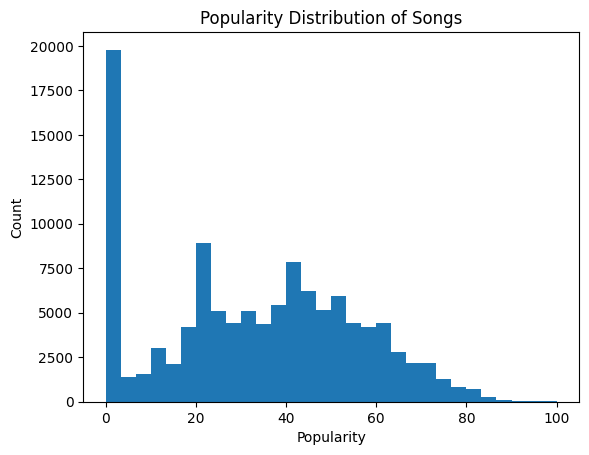

In [9]:
plt.hist(df["popularity"], bins=30)
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.title("Popularity Distribution of Songs")
plt.show()


> A histogram is useful for understanding whether popularity is concentrated in low, medium, or high ranges.
> We can quickly see if most songs are not very popular or if the dataset includes many highly streamed tracks.

----

**Feature Correlation with Popularity**

In [10]:
features = ["danceability", "energy", "valence", "tempo", "loudness"]
corr = df[features + ["popularity"]].corr()
corr["popularity"]


danceability    0.035448
energy          0.001056
valence        -0.040534
tempo           0.013205
loudness        0.050423
popularity      1.000000
Name: popularity, dtype: float64

----

**Top 10 Most Common Genres**

In [11]:
df["track_genre"].value_counts().head(10)


track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
Name: count, dtype: int64

----------------------------

**Average Popularity**

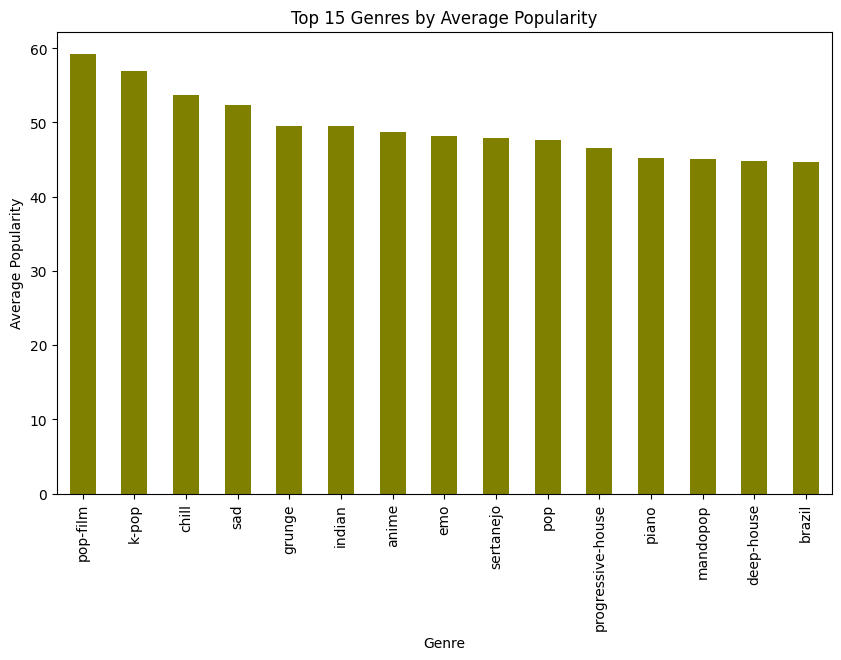

In [38]:
# Calculate average popularity by genre
pop_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Take the top 15 genres
top15 = pop_by_genre.head(15)

# Plot
plt.figure(figsize=(10,6))
top15.plot(kind='bar', color='olive')
plt.title('Top 15 Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.show()


---

**Artists by Average Popularity**

In [19]:
artist_popularity = (
    df.groupby('artists')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

artist_popularity


artists
Sam Smith;Kim Petras           100.0
Bizarrap;Quevedo                99.0
Manuel Turizo                   98.0
Bad Bunny;Chencho Corleone      97.0
Bad Bunny;Bomba Estéreo         94.5
Joji                            94.0
Beyoncé                         93.0
Harry Styles                    92.0
Rema;Selena Gomez               92.0
Rauw Alejandro;Lyanno;Brray     91.0
Name: popularity, dtype: float64

> which artists tend to maintain high popularity across their catalog and highlights the strongest performers in the dataset.

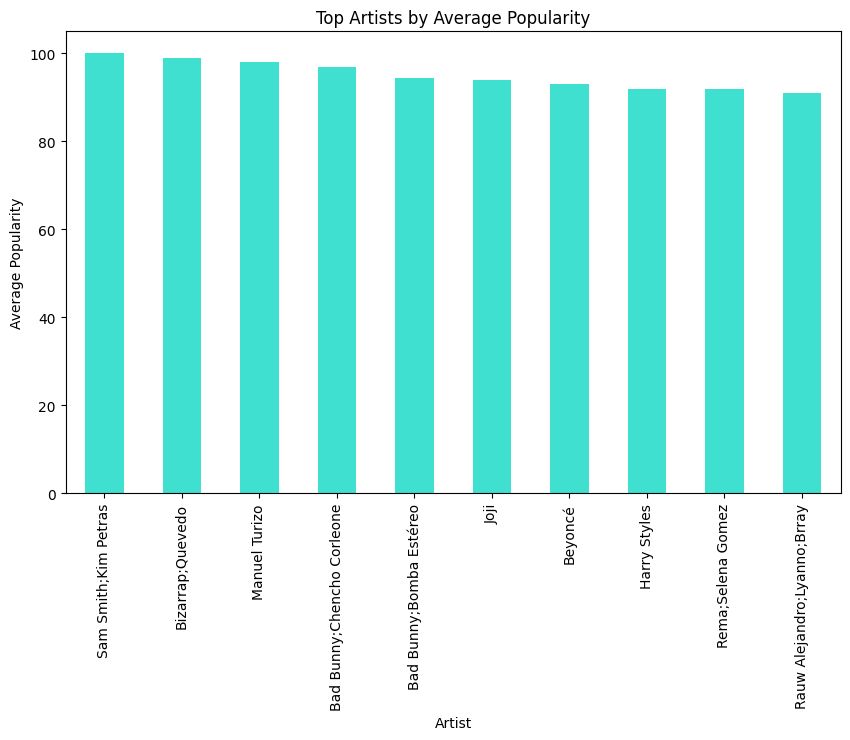

In [37]:
plt.figure(figsize=(10,6))
artist_popularity.plot(kind='bar', color='turquoise')
plt.title('Top Artists by Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.show()


----

**Correlation Between Audio Features and Popularity**

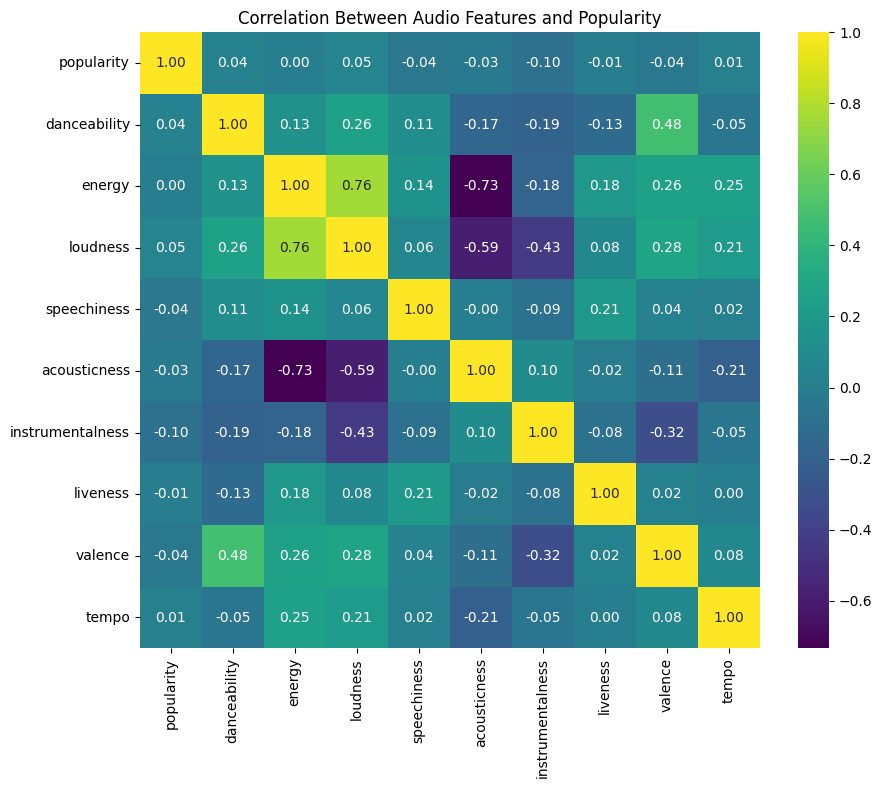

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [
    'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

corr = df[features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Between Audio Features and Popularity')
plt.show()


> By reading the color intensity and correlation values, we can see which musical attributes have the strongest positive or negative relationship with popularity.
It also helps detect highly related features that might contribute similar information in modeling.

-------

**Tempo vs Popularity**

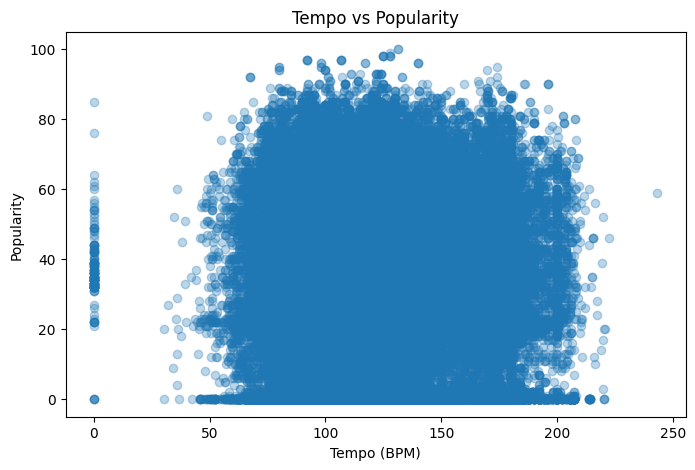

In [26]:
plt.figure(figsize=(8,5))
plt.scatter(df['tempo'], df['popularity'], alpha=0.3)
plt.title('Tempo vs Popularity')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Popularity')
plt.show()


> By observing the density and spread of points, we can see if popularity increases with tempo, decreases, or shows no clear relationship.

---

**Popularity of Explicit vs Non Explicit Songs**

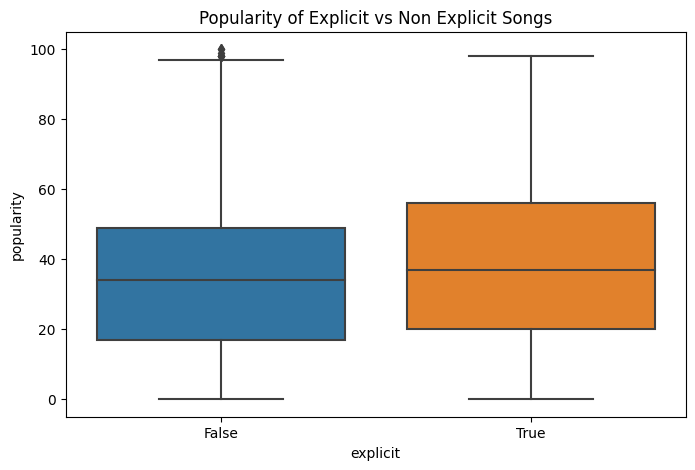

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='explicit', y='popularity', data=df)
plt.title('Popularity of Explicit vs Non Explicit Songs')
plt.show()


* ----

**Acousticness Density Curve**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


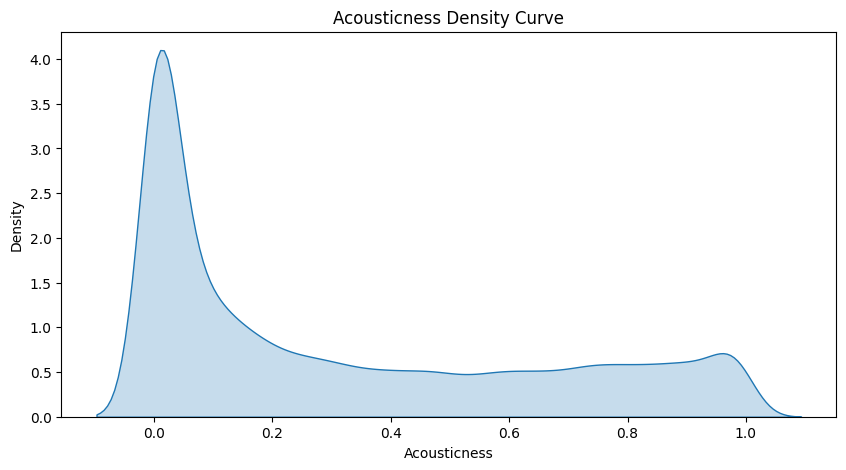

In [31]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['acousticness'], fill=True)
plt.title('Acousticness Density Curve')
plt.xlabel('Acousticness')
plt.ylabel('Density')
plt.show()


-----

**Explicit vs Non Explicit Songs**

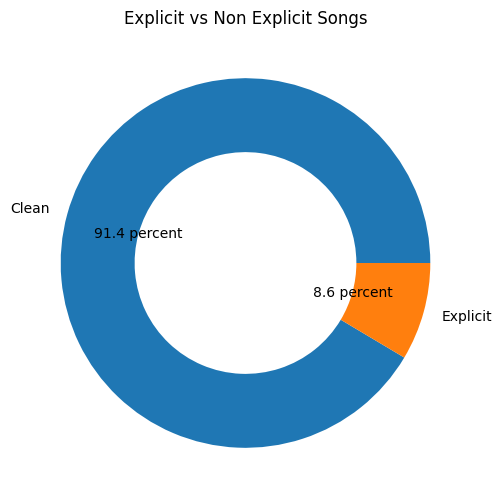

In [32]:
counts = df['explicit'].value_counts()
labels = ['Clean', 'Explicit']

plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, wedgeprops={'width':0.4}, autopct='%1.1f percent')
plt.title('Explicit vs Non Explicit Songs')
plt.show()


----

**Average Audio Features for Pop Genre**

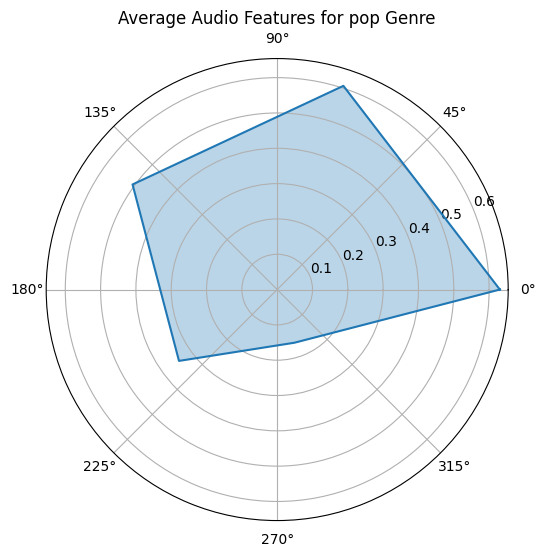

In [34]:
genre = "pop"

genre_data = df[df['track_genre'] == genre][
    ['danceability','energy','valence','acousticness','liveness']
].mean()

labels = genre_data.index
values = genre_data.values
values = list(values) + [values[0]]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

plt.figure(figsize=(6,6))
plt.polar(angles, values)
plt.fill(angles, values, alpha=0.3)
plt.title(f'Average Audio Features for {genre} Genre')
plt.show()


---



****Energy vs Tempo Hexbin Plot****



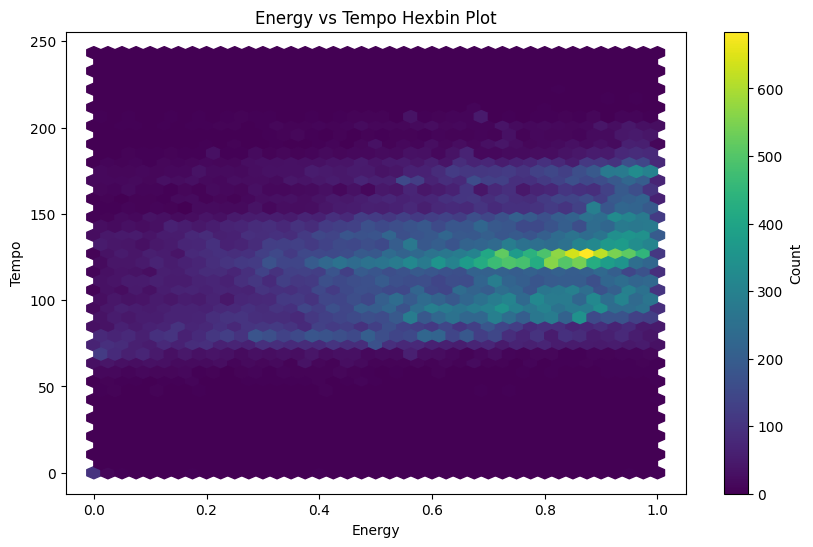

In [36]:
plt.figure(figsize=(10,6))
plt.hexbin(df['energy'], df['tempo'], gridsize=40)
plt.title('Energy vs Tempo Hexbin Plot')
plt.xlabel('Energy')
plt.ylabel('Tempo')
plt.colorbar(label='Count')
plt.show()
